In [27]:
# libs
from numba import set_num_threads
# adjust this to your preference. at least one less than cpu cores is recommended,
# since numba code can't easily be interrupted and you might lock up your system if
# something goes wrong
set_num_threads(8)

import matplotlib.pyplot as plt

import numpy as np

%matplotlib widget
from IPython import display

from scipy.optimize import curve_fit



# code
import randomwalk
import energy
import randomwalk_statistics
import annealing
import interaction

### Constants:

In [20]:
# consts
LEN_PROTEINS = 100

NUM_AVGS_WALK = 10000
LEN_WALK = 100

NUM_AVGS_EVALUES = int(1e6)

NUM_MC_STEPS = int(1e5)

NUM_T_STEPS_ANNEALING = int(1e4)
NUM_STEPS_AT_T_ANNEALING = int(1e2)
INIT_TEMP_ANNEALING = 10
FINAL_TEMP_ANNEALING = 1

# plotting
DPI = 600
FMT = 'png'

### Fit functions:

In [7]:
def power(x, a, b):
    return a*x**b

### Ex. 1:

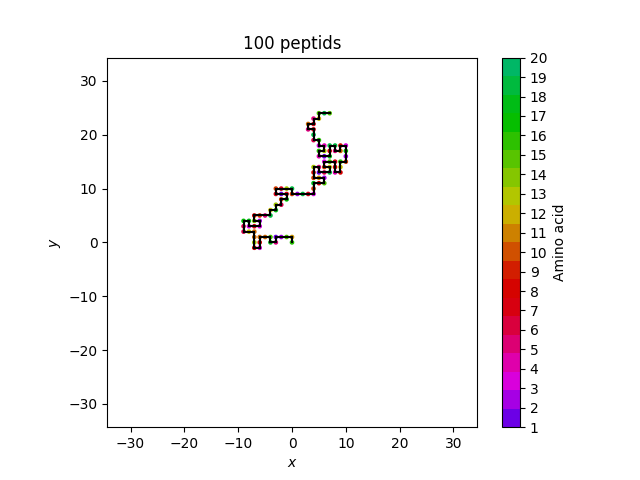

In [8]:
grid, coord_vec = randomwalk.self_avoiding_walk_protein(dim=LEN_PROTEINS, steps=LEN_PROTEINS)
while(coord_vec[-1].x == 0): # discard protein walks that got stuck
    grid, coord_vec = randomwalk.self_avoiding_walk_protein(dim=LEN_PROTEINS, steps=LEN_PROTEINS)
fig, ax = randomwalk.plot_protein(coord_vec, dim=LEN_PROTEINS/3, path="")
plt.savefig(f'figures/ex1.{FMT}', dpi = DPI, format = FMT)

### Ex. 2:

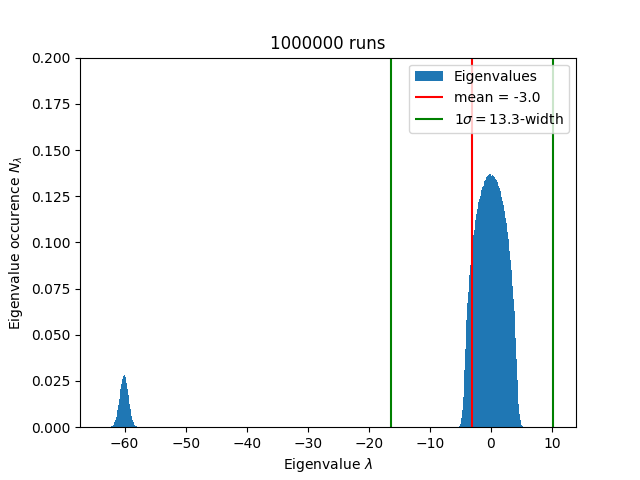

In [9]:
fig, ax, eigenvalues, ev_mean, ev_std = energy.eigenvalue_statistics(runs=NUM_AVGS_EVALUES, path="")
plt.savefig(f'figures/ex2.{FMT}', dpi = DPI, format = FMT)

### Ex. 3:

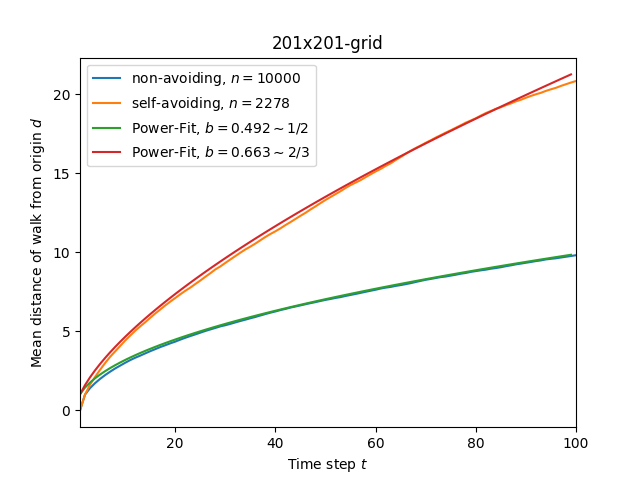

In [10]:
fig, ax, distance_r, distance_sa = randomwalk_statistics.mean_sq_pos_stats_both(NUM_AVGS_WALK, LEN_WALK, LEN_WALK, "")
step = np.asarray(range(LEN_WALK))
p, c = curve_fit(power, step, distance_r)
p2, c2 = curve_fit(power, step, distance_sa)
ax.plot(step, power(step, p[0], p[1]), label=f"Power-Fit, $b={np.round(p[1], 3)}\\sim 1/2$")
ax.plot(step, power(step, p2[0], p2[1]), label=f"Power-Fit, $b={np.round(p2[1],3)}\\sim 2/3$")
#ax.loglog()
ax.set_xlim([1, LEN_WALK])
ax.legend()
fig.savefig(f'figures/ex3.{FMT}', dpi = DPI, format = FMT)


Exponenten entsprechen exakten Resultaten!

### Ex. 4:

Energiebarrieren: [0.03800225 0.12509321 0.03395553]


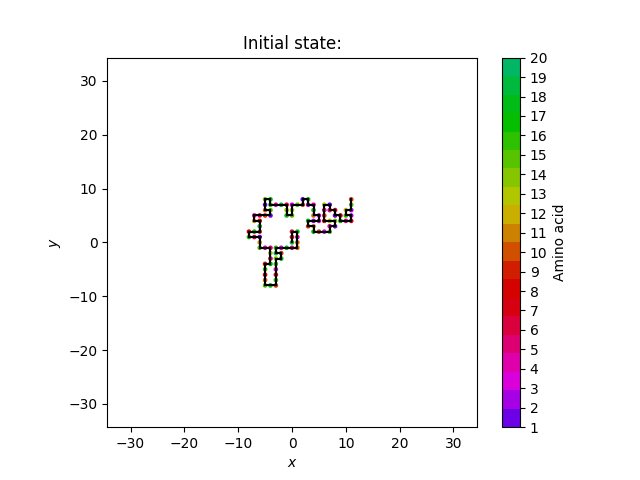

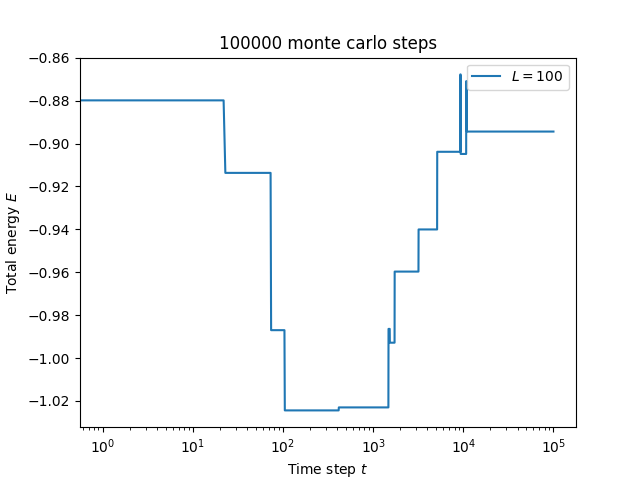

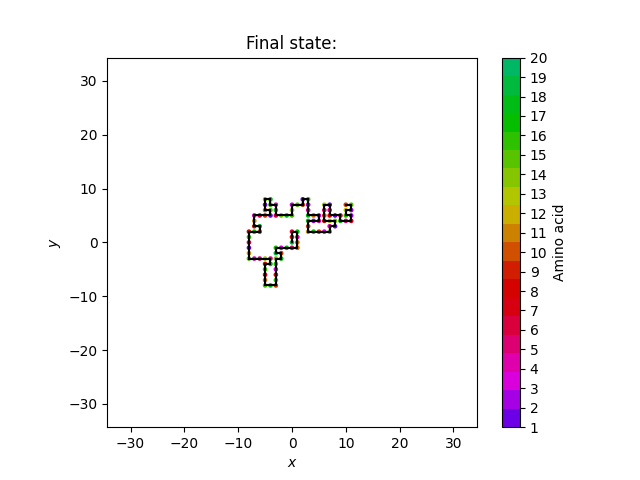

In [11]:
#anim, fig, ax1, ax2, grids_vecs = energy.animated_monte_carlo(50, 100, 1, 1, 8, "data")
#vid = anim.to_html5_video()
#html = display.HTML(vid)
#display.display(html)
fig, ax, ergs, grid, coord_vec, figPrev, axPrev = energy.evolve_protein_plot_energy(length=LEN_PROTEINS, mc_steps=NUM_MC_STEPS, T=1, path="")
axPrev.set_title("Initial state:")
figPrev.savefig(f'figures/ex4_protein_prev.{FMT}', dpi = DPI, format = FMT)
ax.semilogx()
fig.savefig(f'figures/ex4_erg.{FMT}', dpi = DPI, format = FMT)
fig2, ax2 = randomwalk.plot_protein(coord_vec=coord_vec, dim=LEN_PROTEINS/3, path="")
ax2.set_title("Final state:")
fig2.savefig(f'figures/ex4_protein.{FMT}', dpi = DPI, format = FMT)

# 🔴add barrier!🔴

### Ex. 5:

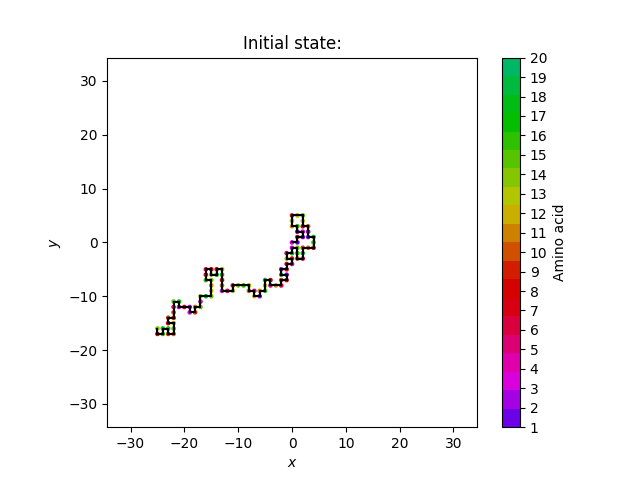

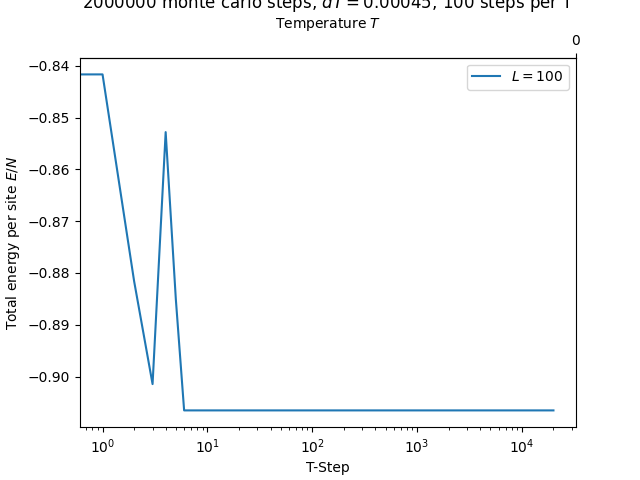

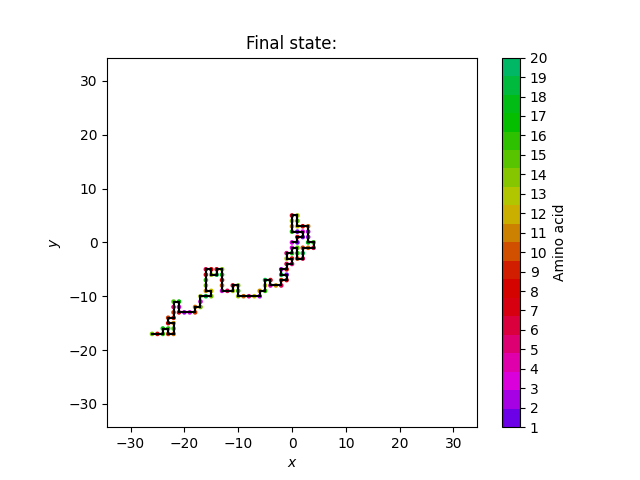

In [12]:
ergs, grid, coord_vec, fig, ax, ax2, figPrev, axPrev = annealing.averaged_annealing(length=LEN_PROTEINS, T_steps=NUM_T_STEPS_ANNEALING, num_at_T=NUM_STEPS_AT_T_ANNEALING, T_i=INIT_TEMP_ANNEALING, T_f=FINAL_TEMP_ANNEALING, path="")
axPrev.set_title("Initial state:")
figPrev.savefig(f'figures/ex5_protein_prev.{FMT}', dpi = DPI, format = FMT)
fig.savefig(f'figures/ex5_erg.{FMT}', dpi = DPI, format = FMT)
fig3, ax3 = randomwalk.plot_protein(coord_vec=coord_vec, dim=LEN_PROTEINS/3, path="")
ax3.set_title("Final state:")
plt.savefig(f'figures/ex5_protein.{FMT}', dpi = DPI, format = FMT)

# 🔴add annealing!🔴

# Ex. 6:

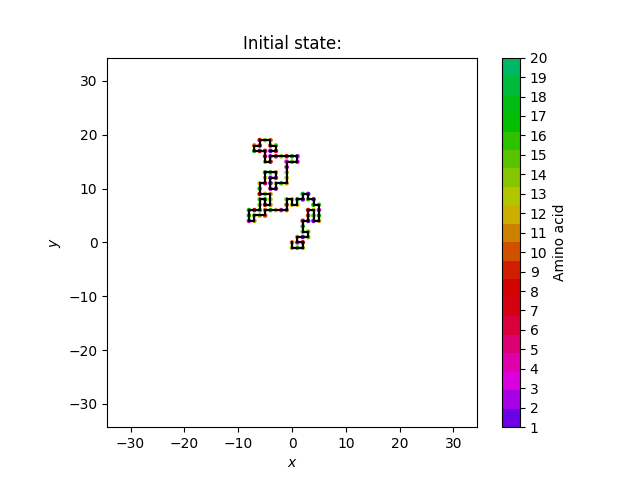

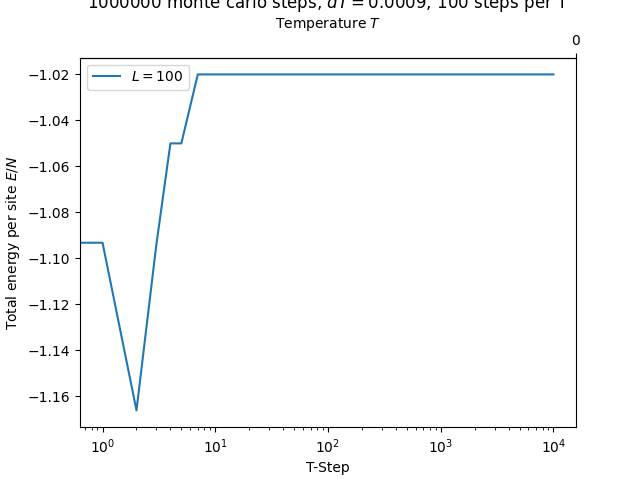

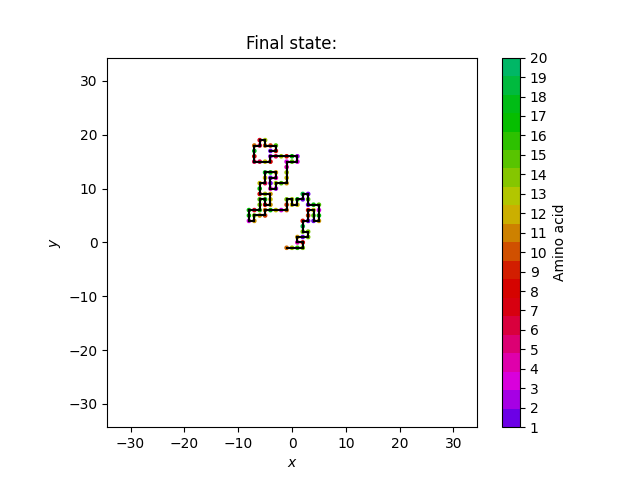

In [28]:
J = np.full((20,20), -3)

ergs, grid, coord_vec, fig, ax, ax2, figPrev, axPrev, fig2, axc, ax3, fig_geo, ax_geo, ax2_geo = interaction.given_interaction_matrix(length=LEN_PROTEINS, T_steps=NUM_T_STEPS_ANNEALING, num_at_T=NUM_STEPS_AT_T_ANNEALING, T_i=INIT_TEMP_ANNEALING, T_f=FINAL_TEMP_ANNEALING,J = J, path="")
axPrev.set_title("Initial state:")
figPrev.savefig(f'figures/ex5_protein_prev.{FMT}', dpi = DPI, format = FMT)
fig.savefig(f'figures/ex5_erg.{FMT}', dpi = DPI, format = FMT)
fig3, ax3 = randomwalk.plot_protein(coord_vec=coord_vec, dim=LEN_PROTEINS/3, path="")
ax3.set_title("Final state:")
plt.savefig(f'figures/ex5_protein.{FMT}', dpi = DPI, format = FMT)

# 🔴add const. exchange plots!🔴

### Analytischer Ausdruck für C:


\begin{align}
    \frac{C}{N} &= \frac{1}{N}\frac{\langle (\Delta H)^2 \rangle}{T^2} = \frac{1}{N}\frac{\langle H^2 \rangle - \langle H \rangle^2}{T^2} \\ & \\
                & \overset{!}{=} \frac{1}{N} \frac{\varepsilon^2\langle n^2 \rangle - \varepsilon^2\langle n\rangle ^2}{T^2} \\ & \\
    \Rightarrow E^2 &= \langle H \rangle^2 = \varepsilon^2 \langle n \rangle^2 \\ 
    \Rightarrow E &= \langle H \rangle = \varepsilon \langle n \rangle
\end{align}

Intuitiv klar: Energie = Anzahl Beiträge * Beitrag

# 🔴add time to find metastable state!🔴

# 🔴add random sign matrix element plots!🔴

# Conclusion:
- Proteins do not reliably fold satisfactorily no matter whether annealing is used.
- We should have performed more folds/steps / averaged more.
- Big sad!